# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from copy import deepcopy

# Reading Data

In [2]:
df = pd.read_csv('dataset/data.csv')
df.head()

,cc_num,name,gender,age,job,city_pop,zip,merchant,category,amt,unix_time,merch_lat,merch_long,is_fraud,name_encoded,gender_encoded,job_encoded,merchant_encoded,category_encoded
0,2291163933867244,405,1,53,287,333497,29209,319,10,2.86,1371816865,33.986391,-81.200714,0,405,1,287,319,10
1,3573030041201292,461,0,31,404,302,84002,591,10,29.84,1371816873,39.450498,-109.960431,0,461,0,404,591,10
2,3598215285024754,74,0,50,271,34496,11710,611,5,41.28,1371816893,40.495810,-74.196111,0,74,0,271,611,5
3,3591919803438423,119,1,34,420,54767,32780,222,9,60.05,1371816915,28.812398,-80.883061,0,119,1,420,222,9
4,3526826139003047,727,1,66,204,1126,49632,292,13,3.19,1371816917,44.959148,-85.884734,0,727,1,204,292,13


In [3]:
df['is_fraud'].value_counts()

0    53574
1     7506
Name: is_fraud, dtype: int64

# Feature Selection

In [4]:
y = df['is_fraud']
X = df[['gender', 'age','zip','category', 'amt']]
X.head()

,gender,age,zip,category,amt
0,1,53,29209,10,2.86
1,0,31,84002,10,29.84
2,0,50,11710,5,41.28
3,1,34,32780,9,60.05
4,1,66,49632,13,3.19


# Train and Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=43, stratify=y)

In [6]:
temp = X_test.copy(deep=True)

In [7]:
X_train.to_csv("dataset/train.csv", index=False)

# Data Scaling

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [9]:
pickle.dump(sc,open('model/sc.pkl','wb'))

# Modeling

## Function to Build model

In [10]:
def build_model(MODEL):
    model = MODEL
    
    print("Fitting model...", end="")
    model.fit(X_train, y_train)
    
    print("\rTrain/Test Prediction...", end="")
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("\rClaculating scores....", end="")
    train_score = f1_score(y_train, y_pred_train)
    test_score = f1_score(y_test, y_pred_test)
    print("\rF1 score for Train data :",train_score)
    print("F1 score for Test data :",test_score)
    
    return train_score, test_score, model

## Helpers

In [11]:
models = {"Logistic Regression":LogisticRegression(),
          "K-Neighbors Classifier": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "Random Forest Classifier": RandomForestClassifier(),
          "AdaBoost Classifier": AdaBoostClassifier(),
          "Support Vector classifer": SVC(),
          "Bagging Classifier": BaggingClassifier()
         }

scores=[f' {"MODEL".ljust(25)} {"Train Score".ljust(12)} {"Test Score".ljust(12)}']

best_model = None
best_test_score = 0

## Evaluating List of Models

In [12]:
for key,MODEL in models.items():
    print(f"{key}:")
    train_score, test_score, model = build_model(MODEL)
    if test_score > best_test_score:
        best_model = deepcopy(model)
        best_test_score = test_score
    print()
    scores.append(f'|{key.ljust(25)}|{str(round(train_score,4)).ljust(12)}|{str(round(test_score,4)).ljust(12)}|')

Logistic Regression:
F1 score for Train data : 0.6448060687630001
F1 score for Test data : 0.6448491747296529

K-Neighbors Classifier:
F1 score for Train data : 0.8927384429449088
F1 score for Test data : 0.8551691281562648

Decision Tree Classifier:
F1 score for Train data : 1.0
F1 score for Test data : 0.8900709219858155

Random Forest Classifier:
F1 score for Train data : 1.0
F1 score for Test data : 0.9105022831050228

AdaBoost Classifier:
F1 score for Train data : 0.7836220472440946
F1 score for Test data : 0.7771232204221895

Support Vector classifer:
F1 score for Train data : 0.8265207595751528
F1 score for Test data : 0.8205897051474262

Bagging Classifier:
F1 score for Train data : 0.9903154664876785
F1 score for Test data : 0.9020866773675762



## CNN Model

In [13]:
model = Sequential()
model.add(Dense(activation = "relu", input_dim = 5, units = 64))
model.add(Dropout(rate=0.2))
model.add(Dense(activation = "relu", units = 128))
model.add(Dropout(rate=0.4))
model.add(Dense(activation = "sigmoid", units = 25))
model.add(Dense(activation = "sigmoid", units = 1))

### Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3225      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 11,955
Trainable params: 11,955
Non-trainable params: 0
____________________________________________________

### Compile Model

In [15]:
model.compile(optimizer = 'adam' ,  loss='binary_crossentropy', metrics=['Precision','Recall'] )

### Fitting CNN Model with early stopping

In [16]:
early_stop = EarlyStopping(patience=5)

In [17]:
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stop]);

Epoch 1/20
669/669 [==============================] - 4s 5ms/step - loss: 0.2221 - precision: 0.7125 - recall: 0.6235 - val_loss: 0.1628 - val_precision: 0.9150 - val_recall: 0.7362
Epoch 2/20
669/669 [==============================] - 3s 4ms/step - loss: 0.1632 - precision: 0.9141 - recall: 0.7389 - val_loss: 0.1601 - val_precision: 0.9133 - val_recall: 0.7482
Epoch 3/20
669/669 [==============================] - 3s 4ms/step - loss: 0.1602 - precision: 0.9223 - recall: 0.7434 - val_loss: 0.1583 - val_precision: 0.9245 - val_recall: 0.7447
Epoch 4/20
669/669 [==============================] - 3s 5ms/step - loss: 0.1589 - precision: 0.9231 - recall: 0.7451 - val_loss: 0.1578 - val_precision: 0.9193 - val_recall: 0.7487
Epoch 5/20
669/669 [==============================] - 3s 5ms/step - loss: 0.1583 - precision: 0.9235 - recall: 0.7472 - val_loss: 0.1578 - val_precision: 0.9144 - val_recall: 0.7540
Epoch 6/20
669/669 [==============================] - 4s 5ms/step - loss: 0.1570 - precisi

### Visualization - Model's Performance

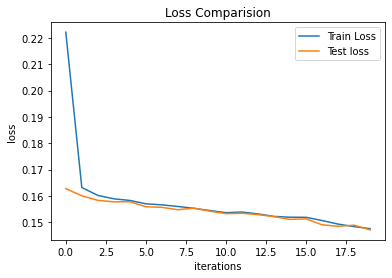

In [18]:
# plt.figure(figsize=(14, 7))
# plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('iterations') 
plt.ylabel('loss') 
plt.title("Loss Comparision")
plt.legend();


### Model Evaluation

In [19]:
# Calculating F1 score using precision and recall for Train/Test data
loss,precision, recall = model.evaluate(X_train, y_train, batch_size=9)
f1_score_train = 2*(precision*recall) / (precision + recall)

loss,precision, recall = model.evaluate(X_test, y_test, batch_size=9)
f1_score_test = 2*(precision*recall) / (precision + recall)

scores.append(f'|{"CNN".ljust(25)}|{str(round(f1_score_train,4)).ljust(12)}|{str(round(f1_score_test,4)).ljust(12)}|')

print("F1 score for Train data : ", f1_score_train )
print("F1 score for Test data : ", f1_score_test )


2036/2036 [==============================] - ETA: 0s - loss: 0.1473 - precision: 0.9504 - recall: 0.75 - 5s 2ms/step - loss: 0.1471 - precision: 0.9501 - recall: 0.7531
F1 score for Train data :  0.8409646014318101
F1 score for Test data :  0.8402278772815044


## Performance Summary

In [20]:
for i in scores:
    print(i)

 MODEL                     Train Score  Test Score  
|Logistic Regression      |0.6448      |0.6448      |
|K-Neighbors Classifier   |0.8927      |0.8552      |
|Decision Tree Classifier |1.0         |0.8901      |
|Random Forest Classifier |1.0         |0.9105      |
|AdaBoost Classifier      |0.7836      |0.7771      |
|Support Vector classifer |0.8265      |0.8206      |
|Bagging Classifier       |0.9903      |0.9021      |
|CNN                      |0.841       |0.8402      |


## Best Model's Performance

In [21]:
best_model

RandomForestClassifier()

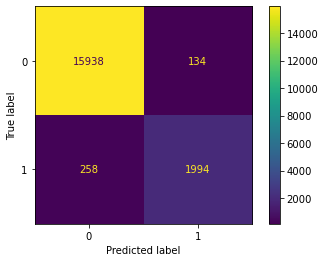

In [23]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
lable=['Geniune','Fraudulent']
ConfusionMatrixDisplay(cm).plot()

In [24]:
import pickle
pickle.dump(best_model,open('model/model.pkl','wb'))